<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/AirQualityPrediction/blob/master/get_data.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a> 

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

%matplotlib inline

# Set major seaborn asthetics
sns.set("notebook", style='ticks', font_scale=1.0)

# Increase the quality of inline plots
mpl.rcParams['figure.dpi']= 500


In [136]:
import unicodedata

def strip_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFKD', text.lower().replace("ł","l")) if unicodedata.category(c) != 'Mn')

CITIES = ["Warszawa", "Kraków", "Poznań", "Katowice", "Białystok"]
PARAMETERS = ['pm25', 'pm10', 'no2', 'so2', 'o3', 'co']

In [138]:
df = pd.read_csv("data/airq_data_1.csv", index_col=0, parse_dates=True)
df.head()

,warszawa,warszawa.1,warszawa.2,warszawa.3,warszawa.4,warszawa.5,krakow,krakow.1,krakow.2,krakow.3,...,katowice.2,katowice.3,katowice.4,katowice.5,bialystok,bialystok.1,bialystok.2,bialystok.3,bialystok.4,bialystok.5
NaN,pm25,pm10,no2,so2,o3,co,pm25,pm10,no2,so2,...,no2,so2,o3,co,pm25,pm10,no2,so2,o3,co
date.local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.914910000000003,9.770674000000001,23.20904,249.91,11.2,12.408,12.44,0.9,41.2,296.8
2018-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.509104166666656,13.310314285714286,15.636835416666669,303.80625000000003,12.625,20.359166666666663,19.879166666666666,0.7708333333333334,27.695652173913043,320.75
2018-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.78881041666667,16.33371666666667,3.306182083333334,641.0562500000001,19.458333333333332,23.777500000000003,12.904166666666669,0.6708333333333333,25.083333333333332,313.2916666666667


In [221]:
indices = [""] + [f".{i}" for i in range(1, 6)]
data = {}

for city in CITIES:
    data[strip_accents(city)] = pd.DataFrame(df, columns=[f"{strip_accents(city)}{item}" for item in indices])
    data[strip_accents(city)] = data[strip_accents(city)].rename(columns=data[strip_accents(city)].iloc[0]).drop(data[strip_accents(city)].index[0])
    data[strip_accents(city)] = data[strip_accents(city)].drop(index="date.local").astype(float)
    data[strip_accents(city)].index = pd.to_datetime(data[strip_accents(city)].index)




In [222]:
data["warszawa"]

,pm25,pm10,no2,so2,o3,co
2018-11-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-22,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-23,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-24,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-12-18,37.777281,42.442982,29.465543,6.770435,6.868626,1334.217391
2020-12-19,36.421228,40.852895,23.945761,4.084348,8.846803,1185.043478
2020-12-20,30.318833,31.197000,17.121458,4.358333,18.062042,988.041667
2020-12-21,30.687833,32.746083,23.669479,5.507917,15.765789,1196.083333


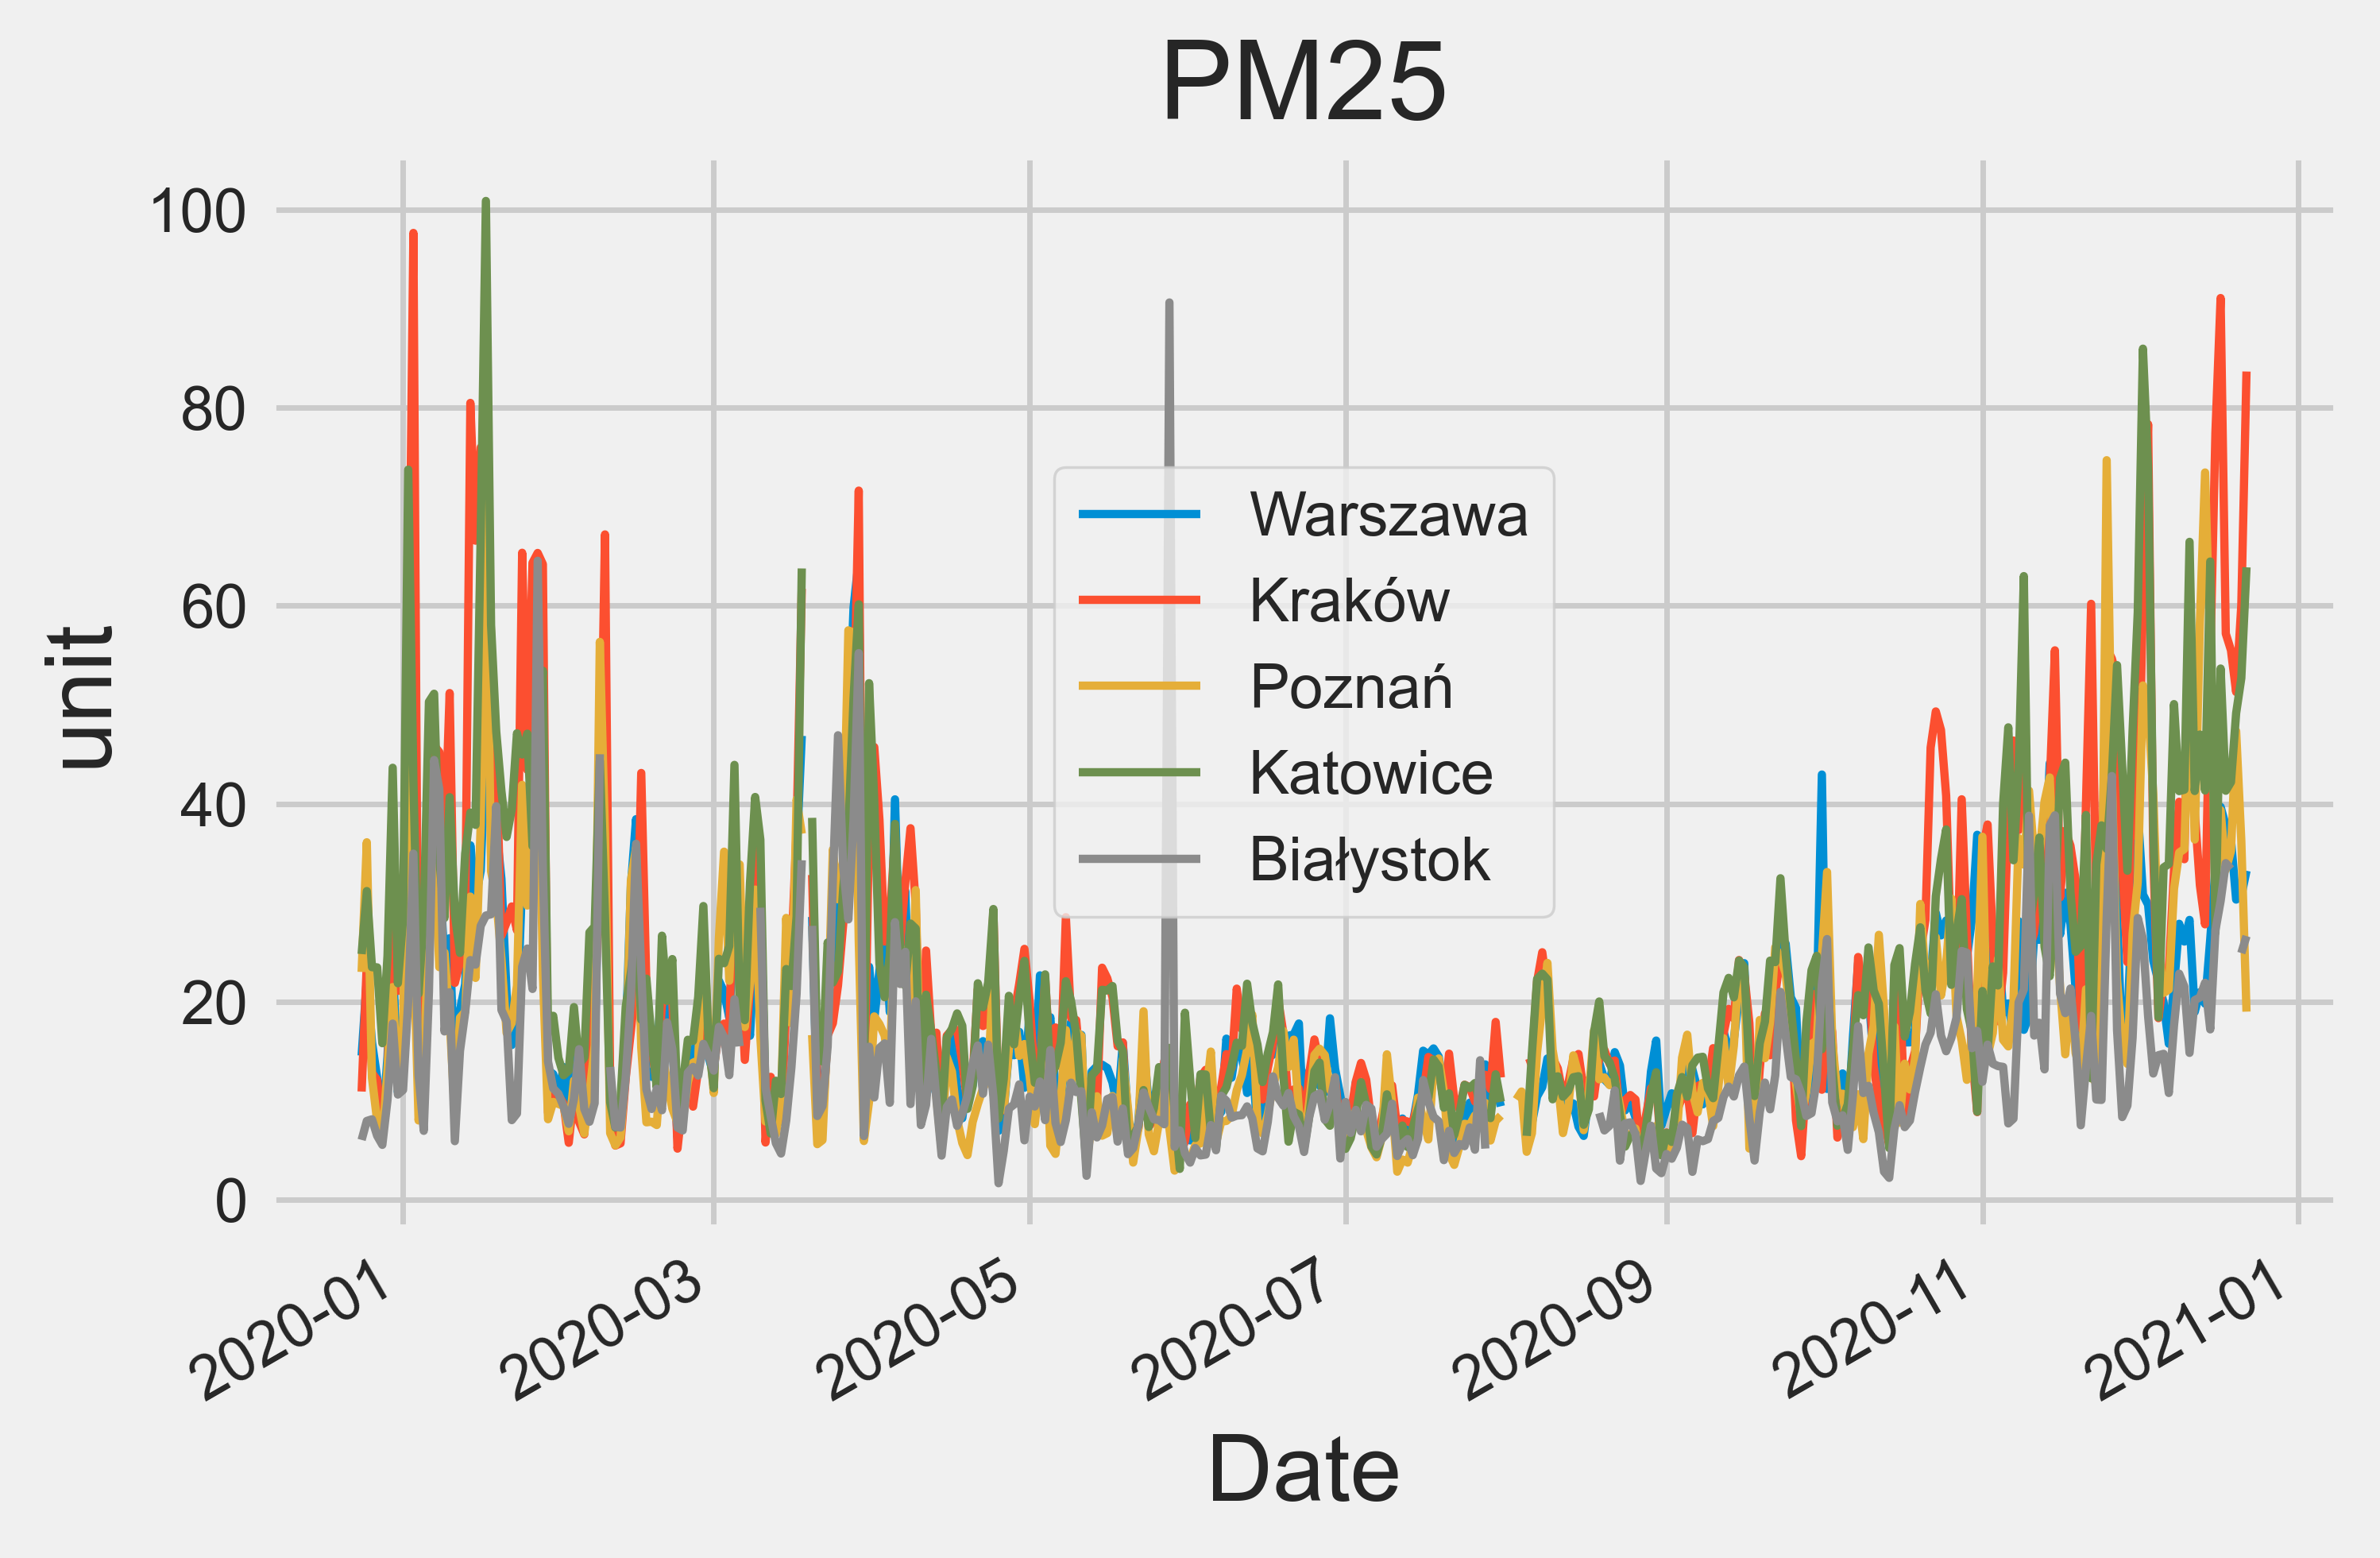

In [242]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
for city in CITIES:
    ax.plot(data[strip_accents(city)].tail(365).index, data[strip_accents(city)]["pm25"].tail(365) ,linewidth=1.5)

ax.legend(CITIES)
ax.set_title("PM25")
ax.set_xlabel("Date")
ax.set_ylabel("unit")

# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
